Project:- Mini_Project_02

> 


Topic:- Time Series Analysis Project Activity

> 


Dataset:- covid_19_india.csv

> 



**(Group_number= 7)**


> 


1.Avinash Sahay

> 

2.Shaheemuddin Farooqi

> 


3.Nakusha alias sadhana janaba sutar

> 



In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Accesing the Data Frame
df = pd.read_csv("/content/covid_19_india.csv",index_col='Date', parse_dates=['Date'])
df.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,5,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.tail()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-09-12,9287,8:00 AM,Telengana,-,-,266120,1480,275261
2020-09-12,9288,8:00 AM,Tripura,-,-,32169,373,32945
2020-09-12,9289,8:00 AM,Uttarakhand,-,-,72435,1307,79141
2020-09-12,9290,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
2020-09-12,9291,8:00 AM,West Bengal,-,-,475425,8820,507995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9291 entries, 2020-01-30 to 2020-09-12
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Time                      9291 non-null   object
 2   State/UnionTerritory      9291 non-null   object
 3   ConfirmedIndianNational   9291 non-null   object
 4   ConfirmedForeignNational  9291 non-null   object
 5   Cured                     9291 non-null   int64 
 6   Deaths                    9291 non-null   int64 
 7   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 653.3+ KB


The Info() function is used to print concies summary of Dataframe.This methode prints information about a Data frame including index dtype and column dtype ,non-null values and memory uses.

In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


The describe() methode is used for calculating some statical data like count,mean.std,min of the series.

In [ ]:
df.isna().sum()



Sno                         0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

isna function used for detecting missing values.There is no missing values.

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df[['State/UnionTerritory']]=df[['State/UnionTerritory']].apply(le.fit_transform)

In [ ]:
df.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,5,6:00 PM,Kerala,3,0,0,0,3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea78d0b90>,
      dtype=object)

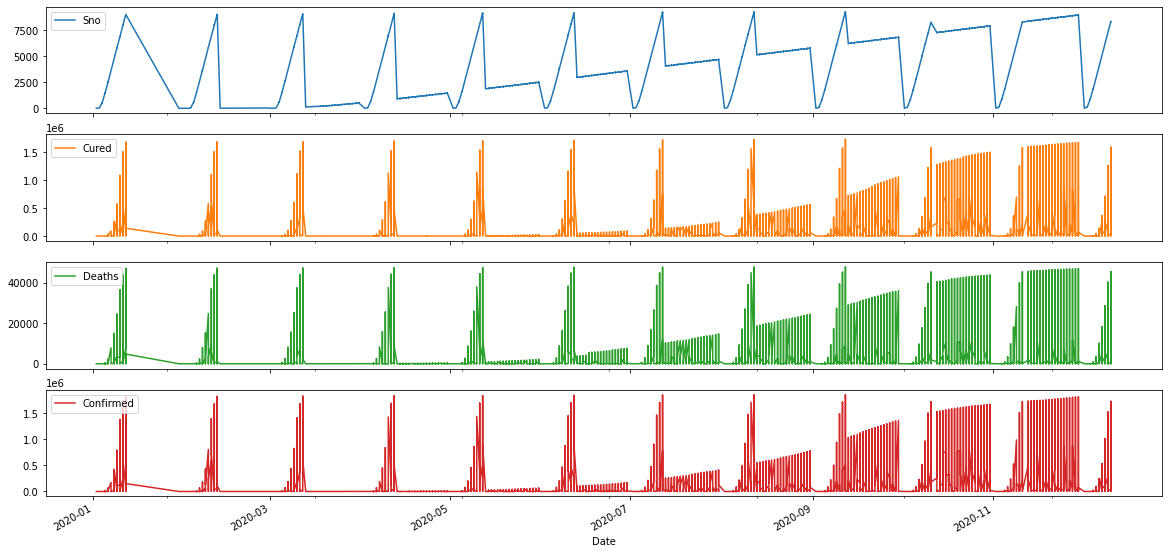

In [ ]:
df.plot(subplots=True,figsize=(20,10))

In [ ]:
pip install plotly


#We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.


# Decomposition
Decomposition will show the observations and these three elements in the same plot:

Trend: Consistent upward or downward slope of a time series.

Seasonality: Clear periodic pattern of a time series

In [ ]:
month=df.resample("M").mean()


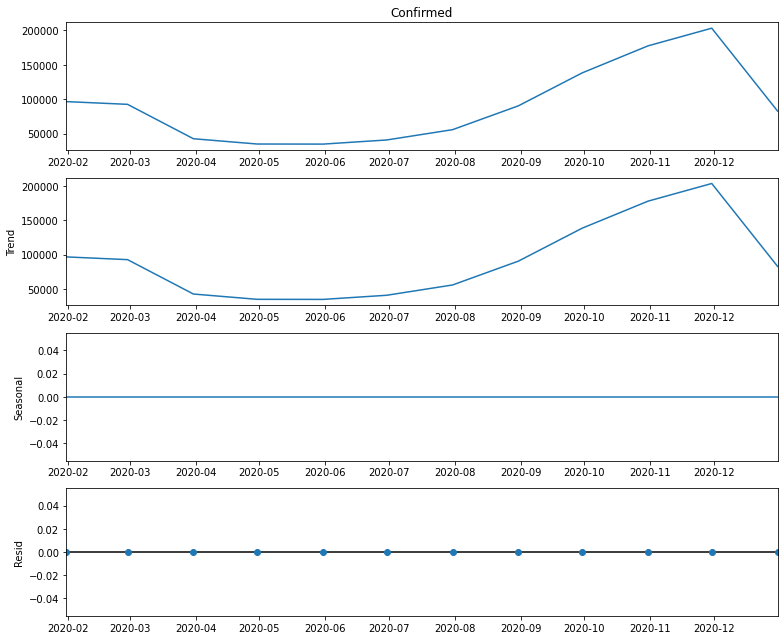

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition=sm.tsa.seasonal_decompose(month["Confirmed"],model='Additive', period = 1)
# decomposition = sm.tsa.seasonal_decompose(df_month[['Confirmed']], model='Additive')
fig = decomposition.plot()

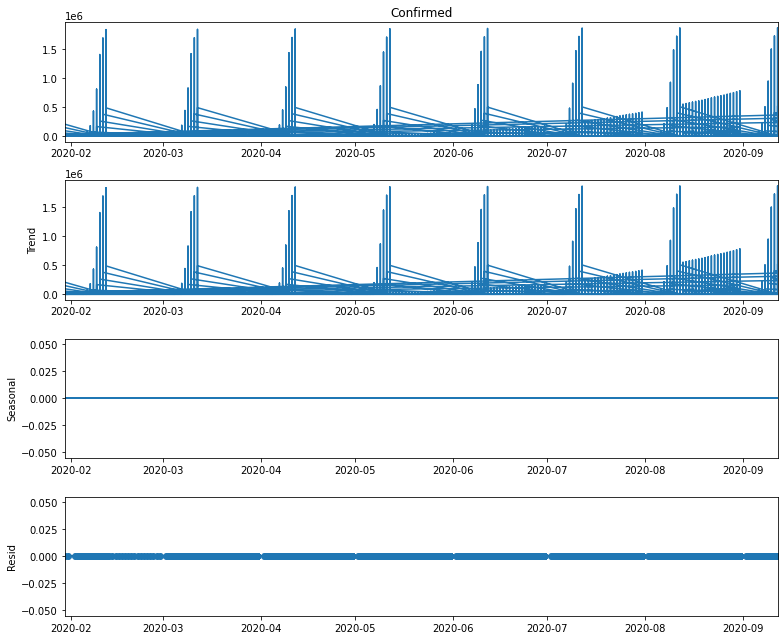

In [ ]:
decomposition=sm.tsa.seasonal_decompose(df["Confirmed"],model='Additive', period = 1)
fig=decomposition.plot()


### Seasonality
The line plot is great for showing seasonality. Resampling for months or weeks and making bar plots is another very simple and widely used method of finding seasonality. Here I am making a bar plot of month data.

<BarContainer object of 12 artists>

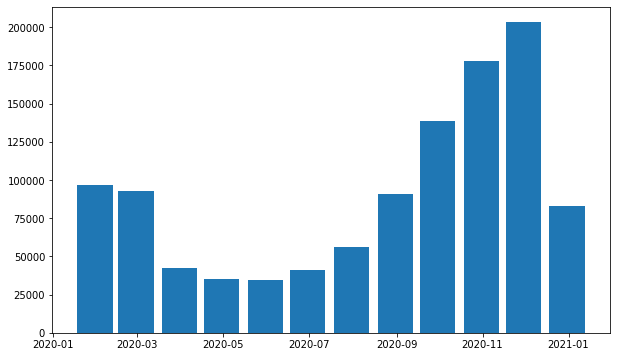

In [ ]:
df_month = df.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_month['2020':].index, df_month.loc['2020':, "Confirmed"], width=25, align='center')

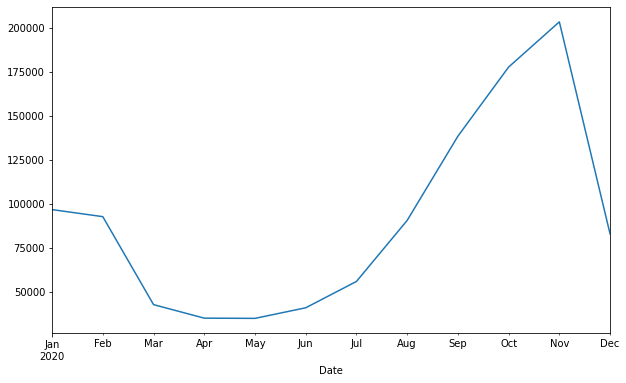

In [ ]:
df_month['Confirmed'].plot(figsize=(10, 6))

In [ ]:
week = df.resample("W").mean()

In [ ]:
week

,Sno,Cured,Deaths,Confirmed
Date,,,,
2020-01-05,1010.079365,146.174603,18.936508,584.301587
2020-01-12,5762.680162,105377.947368,1955.477733,121954.076923
2020-01-19,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN
2020-02-02,2.333333,0.000000,0.000000,1.666667
2020-02-09,3209.203883,21907.917476,623.300971,30887.495146
2020-02-16,7675.559633,200270.853211,3307.357798,221310.146789
2020-02-23,22.000000,0.000000,0.000000,3.000000
2020-03-01,28.500000,0.000000,0.000000,3.000000


# Rolling
Rolling is another very helpful way of smoothing out the curve. It takes the average of a specified amount of data. If I want a 7-day rolling, it gives us the 7-d average data.

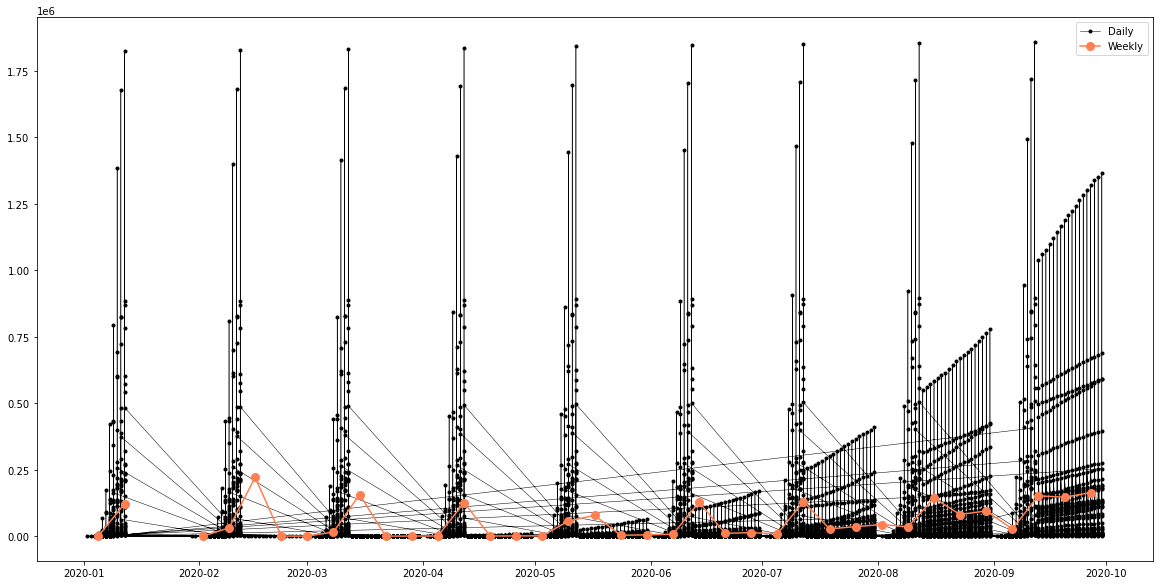

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2020-01':'2020-09', 'Confirmed'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
plt.plot(week.loc['2020-01':'2020-09', 'Confirmed'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.legend()

In [ ]:
roll_10=df.rolling(7, center=True).mean()

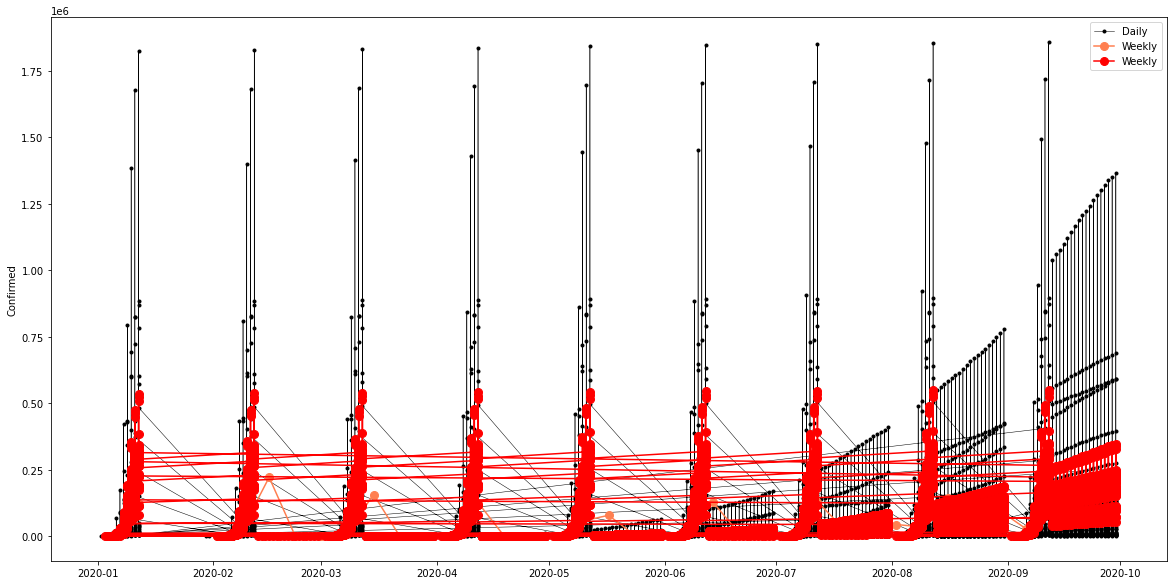

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2020-01':'2020-09', 'Confirmed'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
plt.plot(week.loc['2020-01':'2020-09', 'Confirmed'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.plot(roll_10.loc['2020-01':'2020-09', 'Confirmed'], marker='o', markersize=8, linestyle='-', label='Weekly', color='red')
plt.ylabel("Confirmed")
plt.legend()

In [ ]:
df_month.Confirmed.shape

(12,)

## Stationarity
‘Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

## Dickey-Fuller test
There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
  
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Confirmed"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 8.790278
p-value: 1.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df['Confirmed'])
pval=res[1]
if pval>0.05:
  print("Not stationary")
else:
  print("Stationary")

Not stationary


This suggests that the data has a unit root and is non-stationary.

### Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

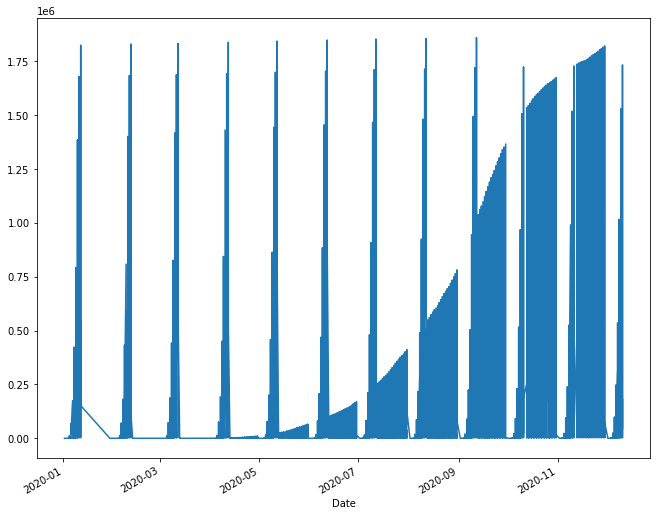

In [ ]:
df["Confirmed"].plot()

### Differencing
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

In [ ]:
df['Confirmed1'] = df['Confirmed'] -df['Confirmed'].shift(1)

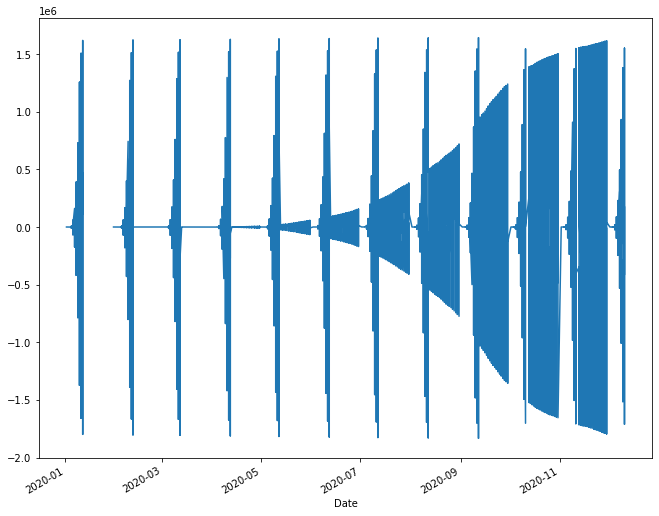

In [ ]:
df["Confirmed1"].plot()

### Seasonal Differencing

In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

In [ ]:
n=7
df['Confirmed2'] = df['Confirmed'] -df['Confirmed'].shift(1)

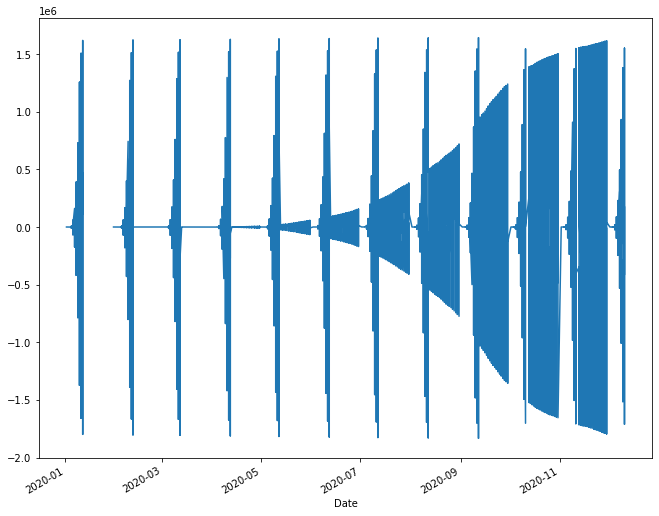

In [ ]:
df["Confirmed2"].plot()

### Transformation

Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on dataset.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


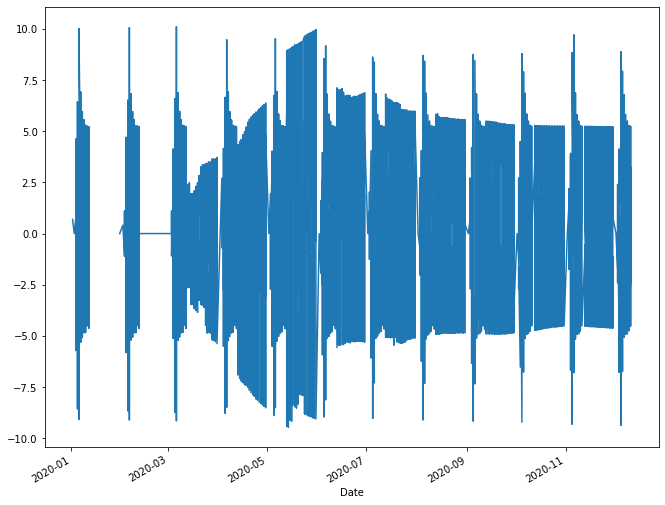

In [ ]:
df['Confirmed3'] = np.log(df["Confirmed"])
df['Conf_log_diff'] = df['Confirmed3'] - df['Confirmed3'].shift(1)
df['Conf_log_diff'].plot()

### ACF & PACF

A time series can have components like trend, seasonality, cyclic and residual. ... ACF considers all these components while finding correlations hence it's a 'complete auto-correlation plot'. PACF is a partial auto-correlation function

You are already familiar with the ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself. The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df_dif2=df["Confirmed"].diff().diff()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


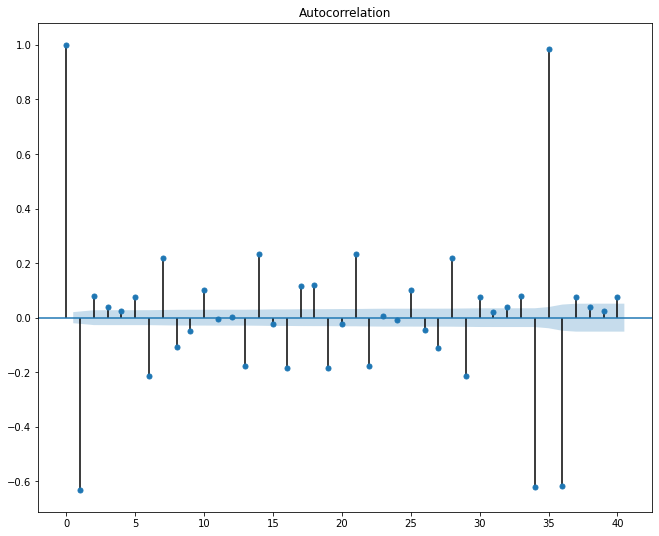

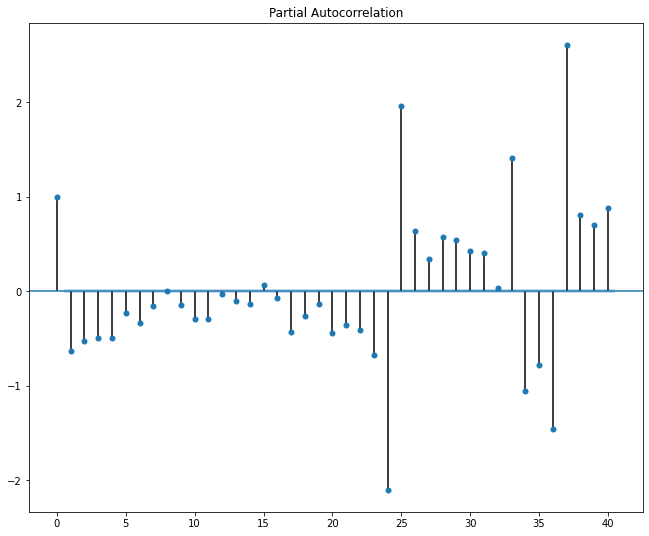

In [ ]:
fig=plot_acf(df_dif2.dropna())
fig1=plot_pacf(df_dif2.dropna())


In [ ]:
res=adfuller(df_dif2.dropna())
pval=res[1]
if pval >0.05:
  print("not stationary")
else:
  print("Stationary")

Stationary


# ARIMA

ARIMA is an acronym for “autoregressive integrated moving average.” It's a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

ARIMA uses a number of lagged observations of time series to forecast observations. A weight is applied to each of the past term and the weights can vary based on how recent they are. AR(x) means x lagged error terms are going to be used in the ARIMA model. ARIMA relies on AutoRegression

In [ ]:
auto_model=auto_arima(df["Confirmed"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=260260.422, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=257745.692, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=260258.422, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=255718.667, Time=0.88 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=254214.958, Time=1.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=253600.974, Time=1.39 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=253602.153, Time=1.77 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.16 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=253598.978, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=254212.960, Time=0.94 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AI

In [ ]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9291
Model:               SARIMAX(4, 1, 0)   Log Likelihood             -126794.489
Date:                Sat, 01 May 2021   AIC                         253598.978
Time:                        14:21:29   BIC                         253634.661
Sample:                             0   HQIC                        253611.101
                               - 9291                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9723      0.008   -126.152      0.000      -0.987      -0.957
ar.L2         -0.8962      0.012    -73.847      0.000      -0.920      -0.872
ar.L3         -0.6085      0.012    -51.688      0.000      -0.632      -0.585
ar.L4         -0.2533      0.012    -20.632      0.000      -0.277      -0.229
sigma2      4.194e+10    1.8e-14   2.33e+24      0.000    4.19e+10    4.19e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             64986.20
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):            1274.40   Skew:                             2.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.22e+39. Standard errors may be unstable.
"""

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.

In [ ]:
X=df["Confirmed"]

In [ ]:
len(X)

9291

In [ ]:
train_len=int(0.8*len(X))

In [ ]:
train=X[:train_len]
len(train)

7432

In [ ]:
test=X[train_len:]
len(test)

1859

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(4,1,0))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Confirmed   No. Observations:                 7431
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -98420.012
Method:                       css-mle   S.D. of innovations         136691.557
Date:                Sat, 01 May 2021   AIC                         196852.024
Time:                        14:21:31   BIC                         196893.504
Sample:                             1   HQIC                        196866.274
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                29.6964    428.245      0.069      0.945    -809.648     869.041
ar.L1.D.Confirmed    -0.9659      0.011    -86.004      0.000      -0.988      -0.944
ar.L2.D.Confirmed    -0.8704      0.014    -61.435      0.000      -0.898      -0.843
ar.L3.D.Confirmed    -0.6166      0.014    -43.527      0.000      -0.644      -0.589
ar.L4.D.Confirmed    -0.2506      0.011    -22.295      0.000      -0.273      -0.229
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1118           -1.2752j            1.2801           -0.2361
AR.2            0.1118           +1.2752j            1.2801            0.2361
AR.3           -1.3423           -0.7960j            1.5606           -0.4148
AR.4           -1.3423           +0.7960j            1.5606            0.4148
-----------------------------------------------------------------------------
"""

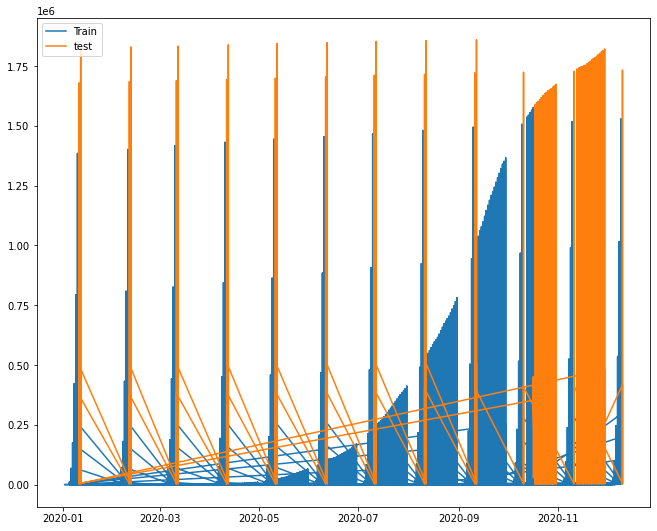

In [ ]:
plt.plot(train,label="Train")
plt.plot(test,label="test")
plt.legend()

In [ ]:
ypred_train=model_fit.predict()

In [ ]:
ypred_train

Date
2020-01-31        29.696407
2020-01-02        44.354874
2020-02-02        62.130653
2020-03-02        86.383040
2020-04-02       108.493943
                  ...      
2020-10-17     -1493.634674
2020-10-17    -48793.563200
2020-10-17    -44384.468672
2020-10-17    123202.731133
2020-10-17   -557996.119248
Length: 7431, dtype: float64

In [ ]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
print(ypred_test,test)

7431    -53581.363236
7432     75854.626939
7433     86926.723305
7434     -1944.803714
7435   -107024.550190
            ...      
9285        29.696407
9286        29.696407
9287        29.696407
9288        29.696407
9289        29.696407
Length: 1859, dtype: float64 Date
2020-10-17     29327
2020-10-17     57042
2020-10-17    449935
2020-10-17    313188
2020-10-18      4083
               ...  
2020-09-12    275261
2020-09-12     32945
2020-09-12     79141
2020-09-12    558173
2020-09-12    507995
Name: Confirmed, Length: 1859, dtype: int64


In [ ]:
date_test=pd.date_range(start="2020-01-30",end="2020-11-12")
date_test

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12'],
              dtype='datetime64[ns]', length=288, freq='D')

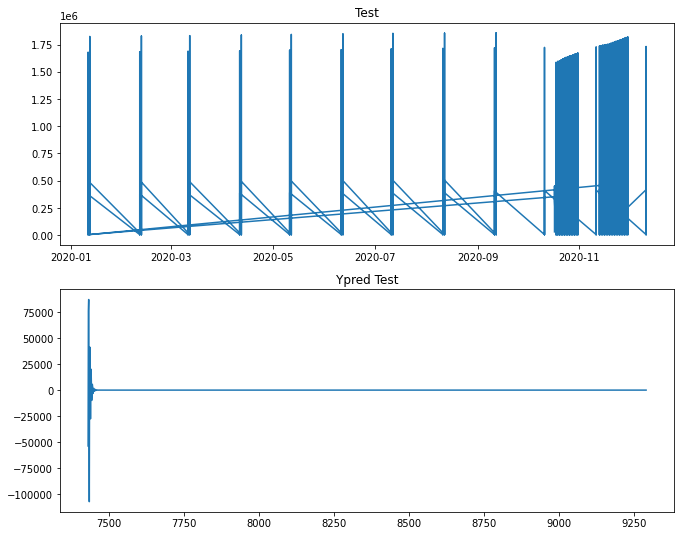

In [ ]:
fix , axs = plt.subplots(2)

axs[0].set_title("Test")
axs[0].plot(test)

axs[1].set_title("Ypred Test")
axs[1].plot(ypred_test)

plt.show()

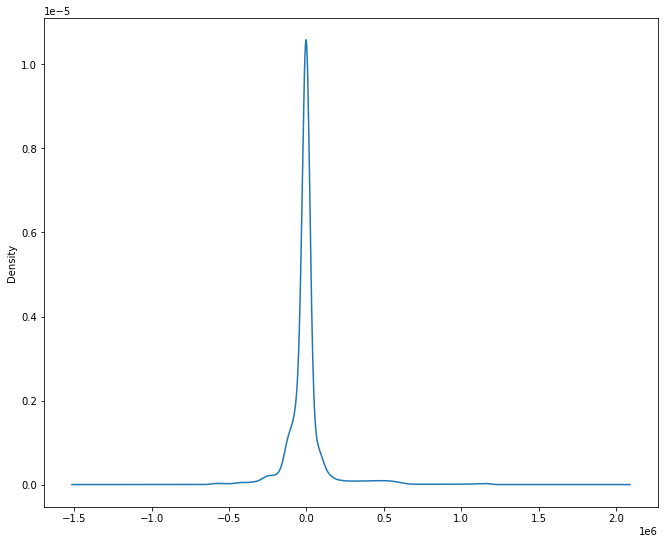

In [ ]:
residuals=model_fit.resid
residuals.plot(kind='kde')

# MSE and RMSE

The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. ... The MSE has the units squared of whatever is plotted on the vertical axis. Another quantity that we calculate is the Root Mean Squared Error (RMSE). It is just the square root of the mean square error.

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 182962863009.1833
RMSE is : 427741.5843814853


In [ ]:
model=ARIMA(X,order=(4,1,0))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa



```
# This is formatted as code
```

# Forecasting

Forecasting is a technique that uses historical data as inputs to make informed estimates that are predictive in determining the direction of future trends. Businesses utilize forecasting to determine how to allocate their budgets or plan for anticipated expenses for an upcoming period of time.


In [ ]:
forecast=model_fit.predict(start=len(X),end=len(X)+29)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
forecast

9290   -347014.650432
9291     79432.052044
9292    143134.528356
9293     13684.230392
9294   -101797.396188
9295    -20283.619978
9296     66569.203556
9297     12122.322822
9298    -33112.170547
9299    -13826.867102
9300     19083.896759
9301     11114.171392
9302    -10904.712197
9303     -7261.412575
9304      5440.651485
9305      5240.415972
9306     -2586.915216
9307     -3447.665890
9308      1308.023785
9309      2268.238527
9310      -420.806970
9311     -1342.040085
9312       174.633810
9313       918.302634
9314        77.687532
9315      -460.800948
9316       -20.536074
9317       357.009647
9318       135.923423
9319      -118.903886
dtype: float64

In [ ]:
forecast_date=pd.date_range(start="2021-01-03",end="2021-02-01")
len(forecast_date),len(forecast)

(30, 30)

In [ ]:
forecast.index=forecast_date

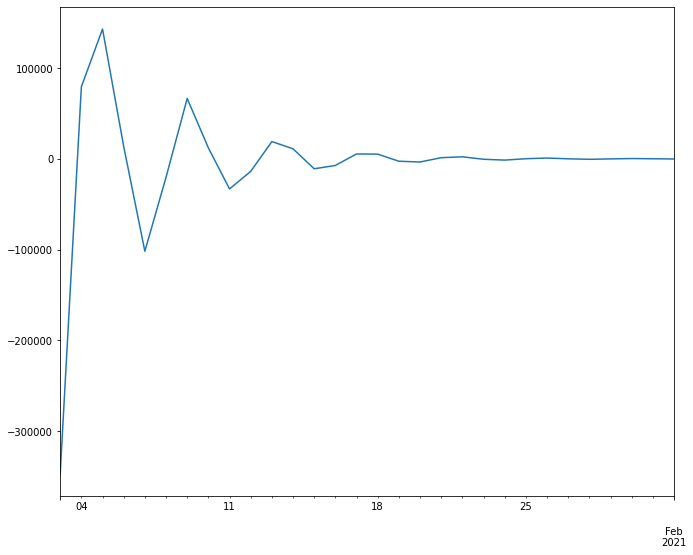

In [ ]:
forecast.plot()

# Conclusions


Time series allows you to analyze major patterns such as trends, seasonality, cyclicity, and irregularity. Time series analysis is used for various applications such as stock market analysis, pattern recognition, earthquake prediction, economic forecasting, census analysis and so on.

Coronavirus disease is an irresistible infection caused by the respiratory disease coronavirus 2 (SARS-CoV-2). It was first found in Wuhan, China, in December 2019, and has since spread universally, causing a constant pandemic. On June 3, 2020, 6.37 million cases were found in 188 countries and regions. During pandemic prevention, this can minimize the impact of the disease on individuals and groups. A study was carried out on coronavirus to observe the number of cases, deaths, and recovery cases worldwide within a specific time period of few months. Based on this data, this research paper will predict the future spread of this infectious disease in human society.

**The purpose of this study is as follows:**

1.
Using time series to predict imminent deaths worldwide

2.
Comparing the root-mean-square value of each model using time series predictive modeling through several methods.

3.
Finding a method suitable for prediction on the COVID-19 dataset

4.
Using ARIMA model for future forecasting of death cases worldwide and many more

This survey will support the government and experts in making arrangements for what is about to happen. Based on the findings of instantaneous model, these models can be adjusted to guide long time.

Thank you